# overview


**The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2....pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255 bold text**

**link my notebook in kaggle**:https://www.kaggle.com/abdelrahman16/american-sign-classification-by-cnn-pytorch

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/american_sign_language.PNG


In [0]:
#import necessary libraries
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import datasets,transforms,models
import torch.nn.functional as F
from torch import nn,optim

from torch.utils.data import Dataset, TensorDataset
from torch.optim import lr_scheduler

import torchvision
import seaborn as sns

In [0]:
train_dir='/kaggle/input/sign-language-mnist/sign_mnist_train.csv'
test_dir='/kaggle/input/sign-language-mnist/sign_mnist_test.csv'

train=pd.read_csv(train_dir)
test=pd.read_csv(test_dir)

In [0]:
#check train data
train.head(10) 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [0]:
#check test data
test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
5,21,72,79,87,101,115,124,131,135,139,...,187,189,192,193,194,194,194,195,195,194
6,10,93,100,112,118,123,127,131,133,136,...,173,175,177,178,180,180,181,181,181,183
7,14,177,177,177,177,177,178,179,179,178,...,232,223,224,224,223,221,221,221,220,219
8,3,191,194,196,198,201,203,204,205,205,...,43,57,78,64,47,62,65,62,62,68
9,7,171,172,172,173,173,173,173,173,172,...,199,199,198,196,195,194,183,85,65,124


In [0]:
#Number of classes we have 

print(train['label'].unique())

print("Number of classes : ",len(train['label'].unique()))

[ 3  6  2 13 16  8 22 18 10 20 17 19 21 23 24  1 12 11 15  4  0  5  7 14]
Number of classes :  24


In [0]:
#obtain all rows and all columns except the 0 index column

train_data = train.iloc[:, 1:].values
print("Number of train images:", train_data.shape[0])
train_labels=train.ix[:, 'label']
print("Number of pixels in each image:", train_data.shape[1])

test_data = test.iloc[:, 1:].values
print("Number of test images:", test_data.shape[0])
test_labels=test.ix[:, 'label']
print("Number of pixels in each image:", test_data.shape[1])



new_train_labels=np.where(train_labels>8, train_labels-1, train_labels)
new_test_labels=np.where(test_labels>8, test_labels-1, test_labels)



unique_val = np.array(new_test_labels)
#np.append (unique_val, 9)
print(np.unique(unique_val))


Number of train images: 27455
Number of pixels in each image: 784
Number of test images: 7172
Number of pixels in each image: 784
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


In [0]:
train_data.shape , new_train_labels.shape

((27455, 784), (27455,))

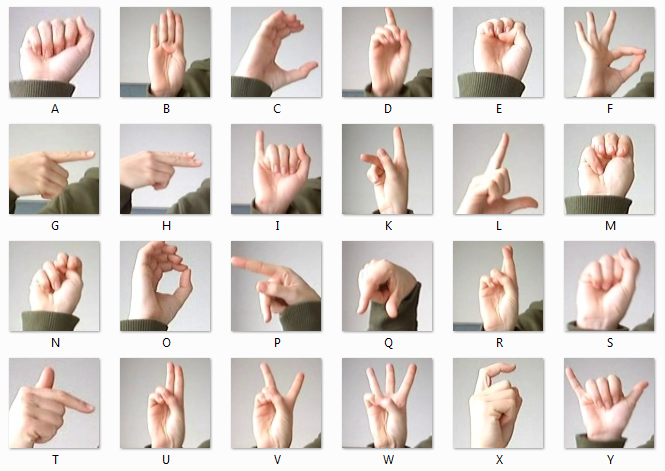

In [0]:
from PIL import Image 

Image.open("/kaggle/input/sign-language-mnist/amer_sign2.png")

In [0]:
letters={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'k',10:'L',11:'M',12:'N',13:'O',14:'P',15:'Q',16:'R',17:'S',18:'T',19:'U',20:'V',21:'W',22:'X',23:'Y'}

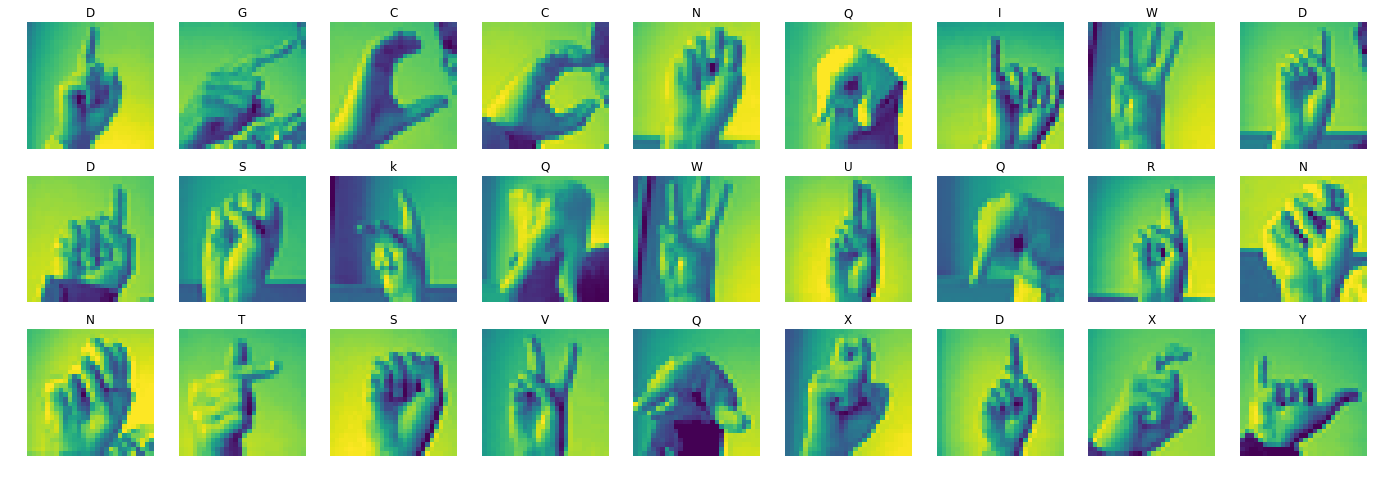

In [0]:

plt.figure(figsize=(24,8))

for i in range(27):
  
  plt.subplot(3,9,i+1)
  plt.imshow(train_data[i].reshape(28,28))
  plt.axis('off')
  plt.title(letters[int((new_train_labels[i]))])

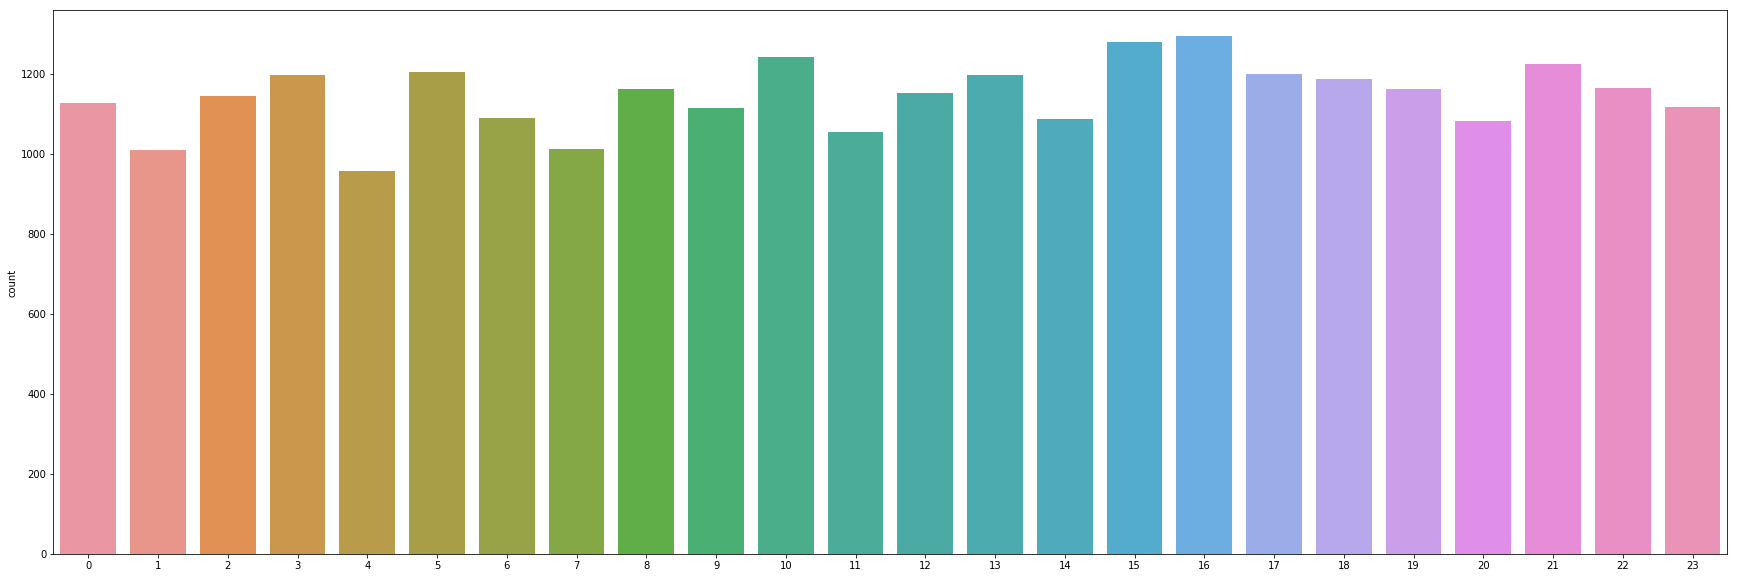

In [0]:

plt.figure(figsize = (30,10))
sns.countplot(new_train_labels)

In [0]:

#Data Augmentation

data_transforms = {
    'train': transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomRotation(25),
        
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], 
                            [0.5])
]),
    
    'valid': transforms.Compose([
        transforms.ToPILImage(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], 
                             [0.5])
    ]),
}

In [0]:
class DtProcessing(Dataset):
    
    #initialise the class variables - transform, data, target
    def __init__(self, data, target, transform=None): 
        self.transform = transform
        self.data = data.reshape((-1,28,28)).astype(np.float32)[:,:,:,None]
        # converting target to torch.LongTensor dtype
        self.target = torch.from_numpy(target).long() 
    
    #retrieve the X and y index value and return it
    def __getitem__(self, index): 
        return self.transform(self.data[index]), self.target[index]
    
    #returns the length of the data
    def __len__(self): 
        return len(list(self.data))
      


In [0]:
#divide train set into train and validation set

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_data, new_train_labels, test_size = .2, random_state = 42)

In [0]:
      
dset_train = DtProcessing(X_train, y_train, transform=data_transforms['train'])

train_loader = torch.utils.data.DataLoader(dset_train, batch_size=20,
                                          shuffle=True, num_workers=0)

dset_valid = DtProcessing(X_valid, y_valid, transform=data_transforms['valid'])

valid_loader = torch.utils.data.DataLoader(dset_valid, batch_size=20,
                                          shuffle=True, num_workers=0)


dset_test = DtProcessing(test_data, new_test_labels, transform=data_transforms['valid'])

test_loader =torch.utils.data.DataLoader(dset_test, batch_size=32, shuffle=True)

In [0]:

import torch.nn.functional as F


class Net(nn.Module):
  
  def __init__(self):
    
    super(Net,self).__init__()
    
    #input depth , output depth , kernel size(filter)x
    
    self.conv1=nn.Conv2d(1,32,kernel_size=(3, 3),padding=(1, 1),stride=(1, 1))
    
    self.conv2=nn.Conv2d(32,32,kernel_size=(3, 3),padding=(1, 1),stride=(1, 1))
    
    self.conv3=nn.Conv2d(32,64,kernel_size=(3, 3),padding=(1, 1),stride=(1, 1))
    
    #padding for last conv layer 
    self.adapt = nn.AdaptiveMaxPool2d((3,3))  
    
    #padding layer
    self.pool=nn.MaxPool2d(2,2)
    
    #dropout layer
    self.drop=nn.Dropout(p=0.2)
    
    #fc layers 
    self.fc1=nn.Linear(64*3*3,240)
    
   
    self.fc2=nn.Linear(240,24)
    
    self.softmax = nn.LogSoftmax(dim=1)
    
  def forward(self,x):
    
    x=self.pool(F.leaky_relu(self.conv1(x)))
    
    x=self.pool(F.leaky_relu(self.conv2(x)))
    
    x=self.adapt(F.leaky_relu(self.conv3(x)))
    
    
    #flatten Images
    x = x.view(x.size(0), -1)
    
    x=self.drop(x)
    
    x=F.leaky_relu(self.fc1(x))
    
    
    x=self.drop(x)
    
    x=self.fc2(x)
    
    return self.softmax(x)

In [0]:

model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)
if torch.cuda.is_available():
  
    model = model.cuda()
    criterion = criterion.cuda()

In [0]:
from torch.autograd import Variable



def train(n_epochs=100):
  
  Training_loss=[]
  Validation_loss=[]
  
  valid_loss_min = np.Inf # track change in validation loss

  for epoch in range(1, n_epochs+1):
    
    

        # keep track of training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        #train
        model.train()
    
    
        for data, target in train_loader:
                 
         
        
            if torch.cuda.is_available():
                   data, target = data.cuda(), target.cuda()
            
        # clear the gradients of all optimized variables
            optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
            output = model(Variable(data))
        
        #print(target.shape)
        # calculate the batch loss
            loss = criterion(output, Variable(target))
        # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
        # perform a single optimization step (parameter update)
            optimizer.step()
        # update training loss
            train_loss += loss.item()*data.size(0)
    #validate
        model.eval()
        accuracy=0.0
        with torch.no_grad():
          for data, target in valid_loader:
      
                 data, target = Variable(data), Variable(target)
        
        #data, target = Variable(data), Variable(target)
                 if torch.cuda.is_available():
                         data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
                 output = model(data)
        
        # calculate the batch loss
                 loss = criterion(output, target)
        # update average validation loss 
                 valid_loss += loss.item()*data.size(0)
        
        
        
    
    # calculate average losses
        train_loss = train_loss/len(train_loader.dataset)
        valid_loss = valid_loss/len(valid_loader.dataset)
        
        Training_loss.append(train_loss/len(train_loader))
        Validation_loss.append(valid_loss/len(valid_loader))
        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \t '.format(
        epoch, train_loss, valid_loss))
    
    
    
    
    
    # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
                  print("==============================================================================================")
                  print('Validation loss decreased ({:.6f} --> {:.6f}).  >>>>>>>  Saving model ...'.format(
                   valid_loss_min,
                     valid_loss)) 
                  print("==============================================================================================")
                  torch.save(model.state_dict(), 'SignModel1.pt')
                  valid_loss_min = valid_loss
  plt.figure(figsize = (25,10))                
  plt.plot(Training_loss, label='Training loss')
  plt.plot(Validation_loss, label='Validation loss')
  plt.legend(frameon=False)      
        

Epoch: 1 	Training Loss: 2.424716 	Validation Loss: 1.458749 	 
Validation loss decreased (inf --> 1.458749).  >>>>>>>  Saving model ...
Epoch: 2 	Training Loss: 1.277237 	Validation Loss: 0.680026 	 
Validation loss decreased (1.458749 --> 0.680026).  >>>>>>>  Saving model ...
Epoch: 3 	Training Loss: 0.905666 	Validation Loss: 0.441057 	 
Validation loss decreased (0.680026 --> 0.441057).  >>>>>>>  Saving model ...
Epoch: 4 	Training Loss: 0.724758 	Validation Loss: 0.383358 	 
Validation loss decreased (0.441057 --> 0.383358).  >>>>>>>  Saving model ...
Epoch: 5 	Training Loss: 0.635377 	Validation Loss: 0.339277 	 
Validation loss decreased (0.383358 --> 0.339277).  >>>>>>>  Saving model ...
Epoch: 6 	Training Loss: 0.569111 	Validation Loss: 0.224753 	 
Validation loss decreased (0.339277 --> 0.224753).  >>>>>>>  Saving model ...
Epoch: 7 	Training Loss: 0.503629 	Validation Loss: 0.157053 	 
Validation loss decreased (0.224753 --> 0.157053).  >>>>>>>  Saving model ...
Epoch: 8 	T

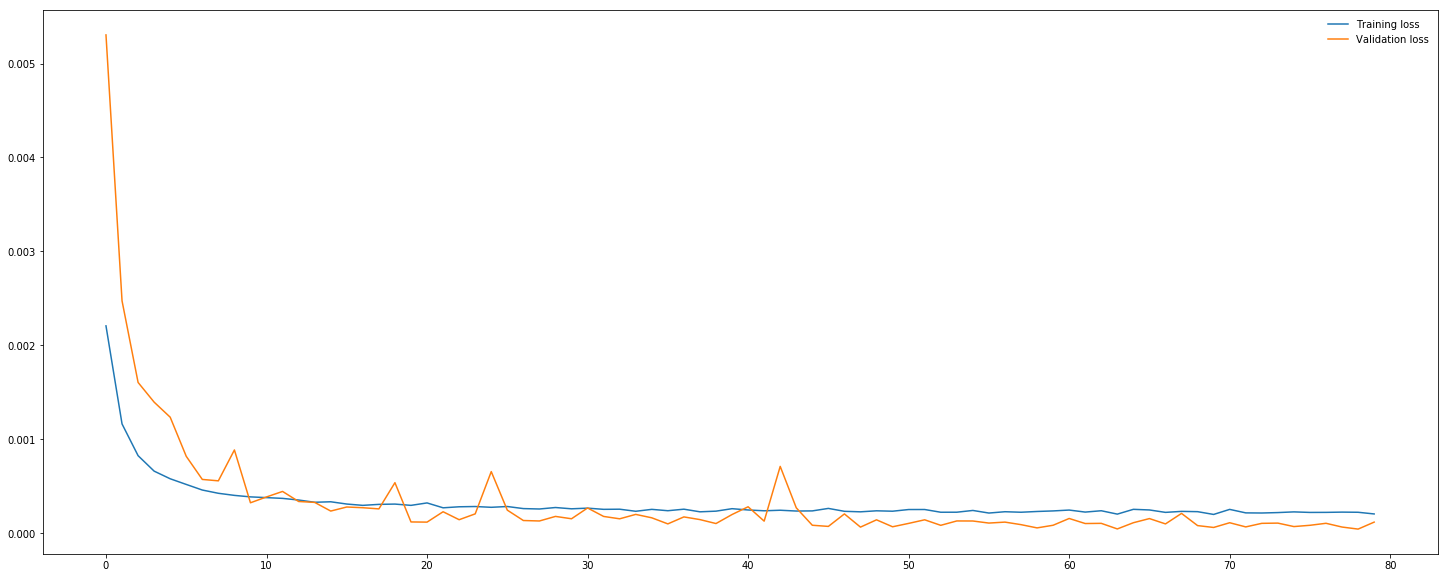

In [0]:
train(80)

In [0]:
model.load_state_dict(torch.load('SignModel1.pt'))

classes=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

In [0]:
def Cal_accurac():
  test_loss = 0.0
  class_correct = list(0. for i in range(24))
  class_total = list(0. for i in range(24))

  model.eval()
# iterate over test data
  for data, target in test_loader:
    
    batch_size = data.size(0)
    #print(batch_size)
    # move tensors to GPU if CUDA is available
    if torch.cuda.is_available():
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not torch.cuda.is_available() else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
  test_loss = test_loss/len(test_loader)
  print('Test Loss: {:.6f}\n'.format(test_loss))

  for i in range(24):
    if class_total[i] > 0 :
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

  print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

In [0]:
Cal_accurac()

Test Loss: 4.326252

Test Accuracy of     A: 100% (331/331)
Test Accuracy of     B: 98% (425/432)
Test Accuracy of     C: 100% (310/310)
Test Accuracy of     D: 100% (245/245)
Test Accuracy of     E: 100% (498/498)
Test Accuracy of     F: 100% (247/247)
Test Accuracy of     G: 95% (333/348)
Test Accuracy of     H: 95% (416/436)
Test Accuracy of     I: 99% (287/288)
Test Accuracy of     K: 97% (323/331)
Test Accuracy of     L: 100% (209/209)
Test Accuracy of     M: 98% (388/394)
Test Accuracy of     N: 92% (269/291)
Test Accuracy of     O: 94% (232/246)
Test Accuracy of     P: 91% (317/347)
Test Accuracy of     Q: 100% (164/164)
Test Accuracy of     R: 99% (143/144)
Test Accuracy of     S: 79% (195/246)
Test Accuracy of     T: 96% (239/248)
Test Accuracy of     U: 92% (246/266)
Test Accuracy of     V: 92% (321/346)
Test Accuracy of     W: 99% (204/206)
Test Accuracy of     X: 100% (267/267)
Test Accuracy of     Y: 94% (313/332)

Test Accuracy (Overall): 96% (6922/7172)
